In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\KABabadzhanov\AppData\Local\Temp\ipykernel_32540\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
avg_price_data = pd.read_csv('housing_in_london_monthly_variables.csv', parse_dates=['date'])
avg_price_data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [3]:
avg_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 741.1+ KB


In [4]:
avg_price_data.describe()

,date,average_price,houses_sold,no_of_crimes,borough_flag
count,13549,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2007-06-30 22:12:58.507638784,2.635197e+05,3893.994129,2158.352063,0.733338
min,1995-01-01 00:00:00,4.072200e+04,2.000000,0.000000,0.000000
25%,2001-04-01 00:00:00,1.323800e+05,247.000000,1623.000000,0.000000
50%,2007-07-01 00:00:00,2.229190e+05,371.000000,2132.000000,1.000000
75%,2013-10-01 00:00:00,3.368430e+05,3146.000000,2582.000000,1.000000
max,2020-01-01 00:00:00,1.463378e+06,132163.000000,7461.000000,1.000000
std,NaN,1.876175e+05,12114.402476,902.087742,0.442230


In [5]:
avg_price_data.shape

(13549, 7)

In [6]:
avg_price_data.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

В столбце `no_of_crimes` отсуствует много данных, поэтому этот столбец дает нам мало информации. В столбце `houses_sold` небольшое количество отсутсвующих данных можно заполнить средним значением столбца

In [7]:
avg_price_data['no_of_crimes'] = avg_price_data['no_of_crimes'].fillna(0)
avg_price_data['houses_sold'] = avg_price_data['houses_sold'].fillna(avg_price_data['houses_sold'].mean())
avg_price_data = avg_price_data.drop('no_of_crimes', axis=1)

In [8]:
avg_price_data.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
borough_flag     0
dtype: int64

In [9]:
avg_price_data['year'] = avg_price_data['date'].apply(lambda x: x.year)

In [10]:
avg_price_data.year.value_counts()

year
1998    542
1996    542
1995    540
2009    540
2019    540
2018    540
2017    540
2016    540
2015    540
2014    540
2013    540
2012    540
2011    540
2010    540
2008    540
2007    540
2006    540
2005    540
2004    540
2003    540
2002    540
2001    540
2000    540
1999    540
1997    540
2020     45
Name: count, dtype: int64

### Данных за каждый год примерно 540, кроме 2020. Уберем данные 2020 года, так как они неполны.

In [11]:
avg_price_data = avg_price_data.loc[avg_price_data['year'] != 2020, :]

In [12]:
avg_price_data.head()

,date,area,average_price,code,houses_sold,borough_flag,year
0,1995-01-01,city of london,91449,E09000001,17.0,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,1,1995
2,1995-03-01,city of london,79121,E09000001,14.0,1,1995
3,1995-04-01,city of london,77101,E09000001,7.0,1,1995
4,1995-05-01,city of london,84409,E09000001,10.0,1,1995


### Оставим только данные Лондона

In [13]:
london_price = avg_price_data[avg_price_data['borough_flag'] == 1].drop('borough_flag', axis=1)
london_price.sample(10)

,date,area,average_price,code,houses_sold,year
1868,2000-03-01,camden,230541,E09000007,351.0,2000
6577,2015-11-01,lambeth,487265,E09000022,343.0,2015
5595,2009-04-01,islington,331763,E09000019,134.0,2009
6979,1999-03-01,merton,114816,E09000024,357.0,1999
4239,1996-08-01,harrow,85977,E09000015,339.0,1996
5512,2002-05-01,islington,246648,E09000019,371.0,2002
6410,2001-12-01,lambeth,170055,E09000022,392.0,2001
6053,1997-04-01,kingston upon thames,94919,E09000021,308.0,1997
7411,2010-02-01,newham,196745,E09000025,137.0,2010
4125,2012-03-01,haringey,325928,E09000014,221.0,2012


### Для предсказания данных нам понадобится вторая таблица

In [14]:
housing_yearly = pd.read_csv('housing_in_london_yearly_variables.csv', parse_dates=['date'], converters={'mean_salary': lambda x: float(x) if x.isdigit() else 0})
housing_yearly.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922.0,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620.0,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128.0,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386.0,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911.0,6,260317.0,NaN,NaN,NaN,1


In [15]:
housing_yearly['date'] = housing_yearly['date'].apply(lambda x: x.year)

In [16]:
len(housing_yearly.area_size.unique())

38

In [17]:
housing_yearly = housing_yearly.loc[housing_yearly['borough_flag'] == 1, :].drop('borough_flag', axis=1)

In [18]:
housing_yearly.sample(5)

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses
612,E09000001,city of london,2011,54381.0,NaN,90842.0,37,7412.0,436000.0,315.0,5513.0
532,E09000023,lewisham,2009,30891.0,NaN,32708.0,17,270418.0,75000.0,3532.0,115576.0
179,E09000027,richmond upon thames,2002,23311.0,NaN,30680.0,23,175441.0,80000.0,5876.0,78676.0
317,E09000012,hackney,2005,28923.0,NaN,35597.0,16,216512.0,95000.0,1905.0,92738.0
130,E09000029,sutton,2001,22972.0,NaN,25235.0,16,181461.0,77000.0,4385.0,77701.0


In [19]:
housing_yearly.dtypes

code                  object
area                  object
date                   int64
median_salary        float64
life_satisfaction    float64
mean_salary          float64
recycling_pct         object
population_size      float64
number_of_jobs       float64
area_size            float64
no_of_houses         float64
dtype: object

### Соединим таблицы по годам

In [20]:
london_price_gr = london_price.groupby(['area', 'year']).agg({'average_price': 'mean', 'houses_sold': 'sum'}).reset_index()
london_price_gr.sample(5)

,area,year,average_price,houses_sold
643,redbridge,2013,274824.916667,2985.0
343,haringey,2013,372233.666667,2665.0
518,kingston upon thames,2013,345739.083333,2764.0
296,hackney,2016,537746.333333,2456.0
94,brent,2014,394687.416667,2984.0


In [21]:
london_price_gr = london_price_gr[london_price_gr['year'] >= 1999]

In [22]:
housing_gr = housing_yearly.groupby(['area', 'date']).agg(
    {'mean_salary': 'mean', 
     'no_of_houses': 'sum', 
     'population_size': 'mean', 
     'median_salary': 'median', 
     'area_size': 'max', 
     'number_of_jobs': 'mean'
     }
     ).reset_index()

housing_gr['year'] = housing_gr['date']
housing_gr.drop('date', axis=1, inplace=True)

In [81]:
data_merged = pd.merge(housing_gr, london_price_gr, on=['area', 'year'], how='left')
data_merged.head()

,area,mean_salary,no_of_houses,population_size,median_salary,area_size,number_of_jobs,year,average_price,houses_sold
0,barking and dagenham,23620.0,0.0,162444.0,21480.0,NaN,NaN,1999,65320.833333,2686.0
1,barking and dagenham,24696.0,0.0,163893.0,22618.0,NaN,57000.0,2000,77549.500000,2813.0
2,barking and dagenham,26050.0,68298.0,165654.0,22323.0,3780.0,54000.0,2001,88664.000000,3203.0
3,barking and dagenham,26653.0,68526.0,166357.0,24813.0,3780.0,52000.0,2002,112221.916667,3449.0
4,barking and dagenham,27792.0,68837.0,166210.0,25358.0,3780.0,55000.0,2003,142499.000000,3615.0


### Посмотрим на корреляции

<Axes: >

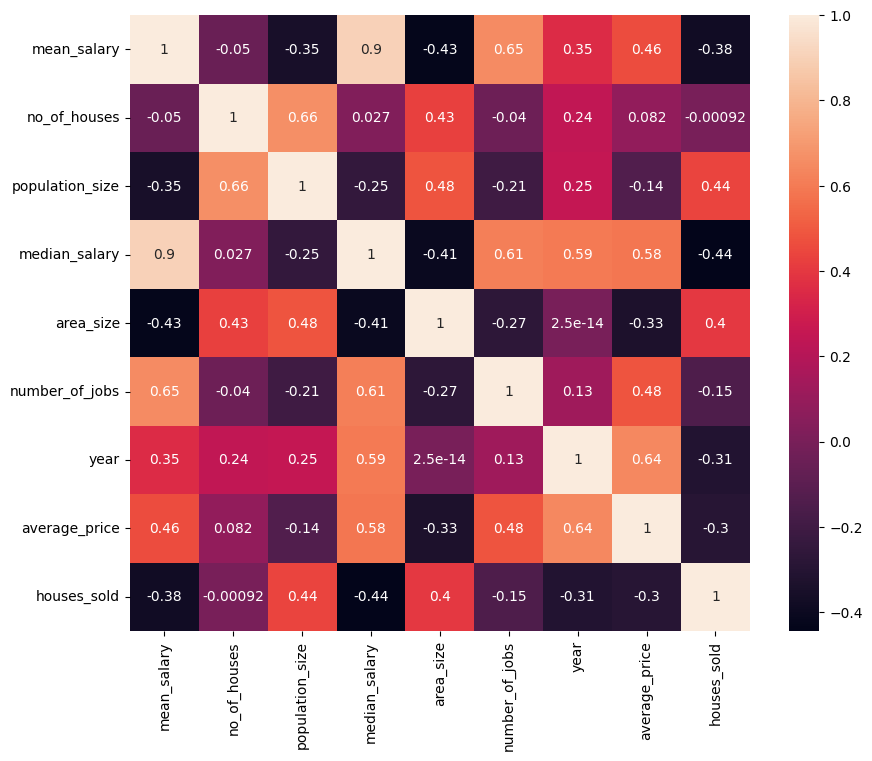

In [82]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(data_merged.drop('area', axis=1).corr(), annot=True)

Можно видеть положительную корреляцию средней цены со средней и медианной зарплатами, а также также отрицательную корреляцию с размером области и количеством проданных домов. Вполне логично, что средняя зарплата и количество работы, т.е. экономиеское процветание коррелирует с ценами на дома. Посмотрим на зависимости между этими величинами.

In [83]:
features = ['median_salary', 'mean_salary', 'number_of_jobs']

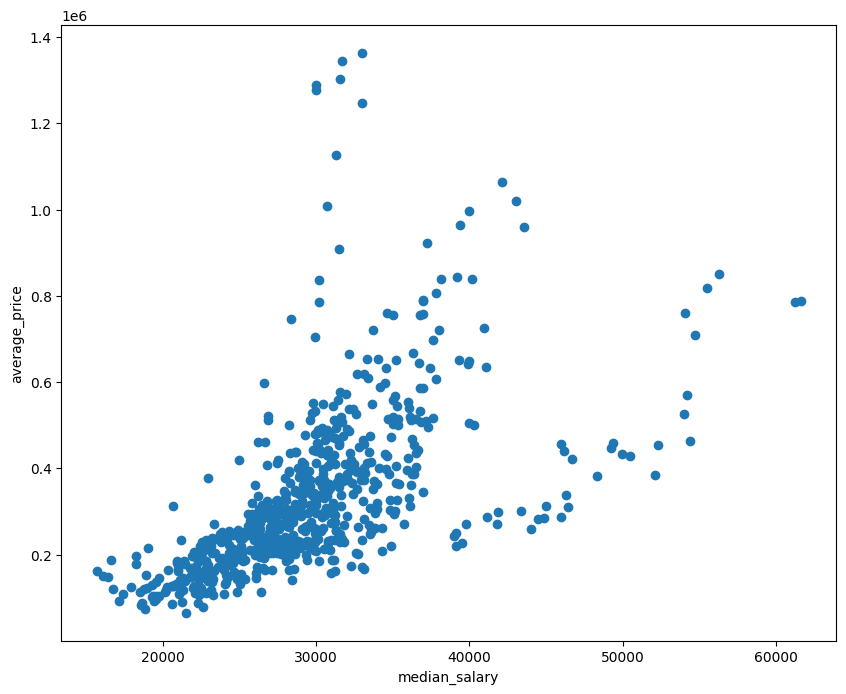

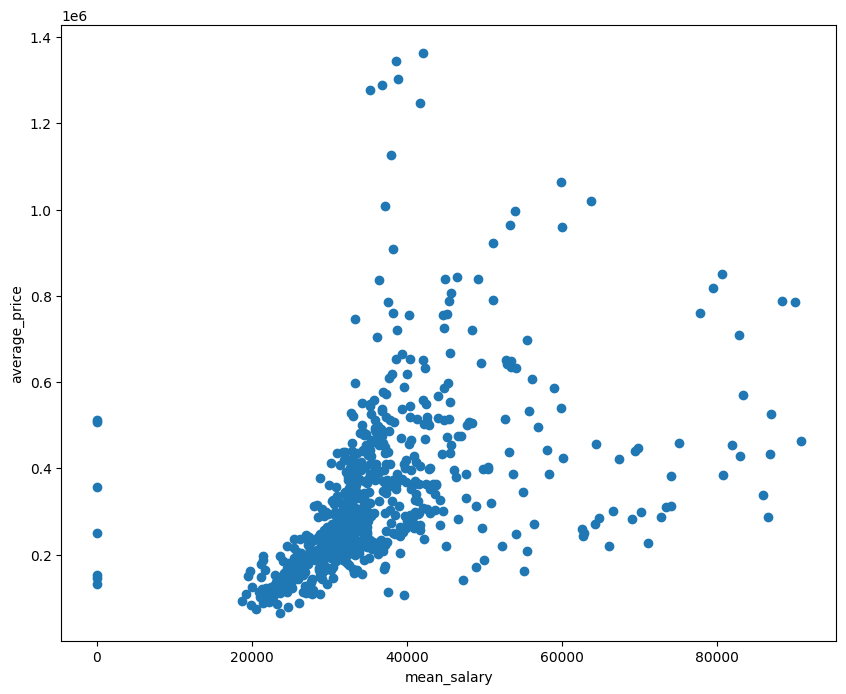

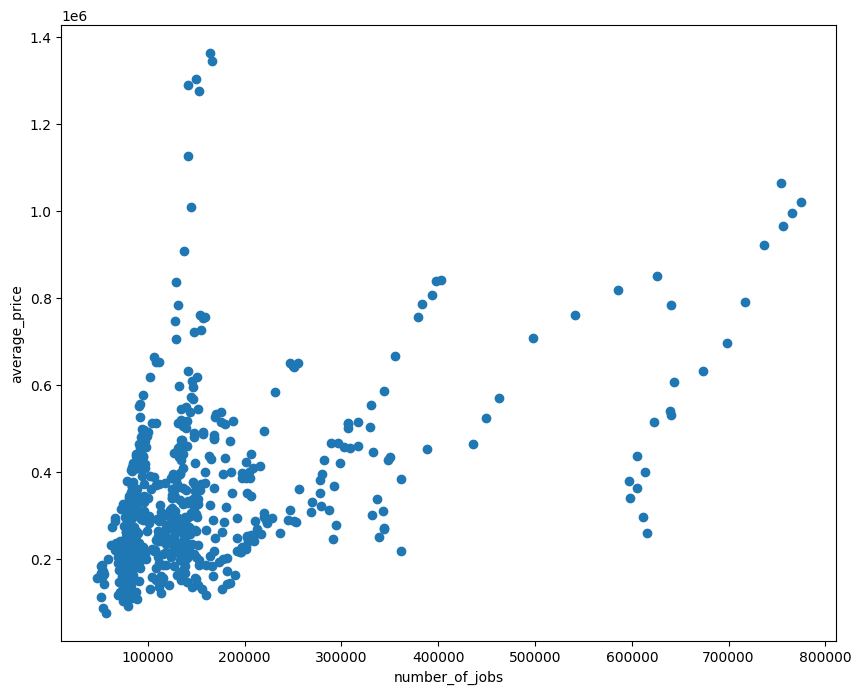

In [84]:
for feat in features:
    plt.scatter(data_merged[feat], data_merged['average_price'])
    plt.xlabel(feat)
    plt.ylabel('average_price')
    plt.show()

### Линейная регрессия

Попробуем предсказать цены при помощи линейной модели.

In [87]:
data_merged.isnull().sum()
data_merged = data_merged.dropna()
#data_merged['number_of_jobs'] = data_merged['number_of_jobs'].fillna(data_merged['number_of_jobs'].mean())
#data_merged['area_size'] = data_merged['area_size'].fillna(data_merged['area_size'].mean())
#data_merged['median_salary'] = data_merged['median_salary'].fillna(data_merged['median_salary'].mean())

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

X, y = data_merged.drop(['average_price', 'area', 'population_size'], axis=1), data_merged['average_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(r2_score(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

0.3279011259311615
81330.07973084859


0.6826081033191289
52716.79629629629
